In [1]:
import os
import numpy as np
import pandas as pd
import requests
from bs4 import BeautifulSoup
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt

In [2]:
pip install geopandas

Note: you may need to restart the kernel to use updated packages.


In [49]:
df = pd.read_csv("WBC_RJ_0.csv")

In [4]:
df.head(100)

,rural_or_urban,State Name,District Name,Block/Tehsil Name,Village Name,town_municipalty_name,ward_name,si_no_of_water_body_within_village_town,unique_id,water_body_name,...,no_people_benefited_by_water_body,ref_selection_id_wua_exists_name,extent_of_area_covered_by_wua,number_of_wua_formed,ref_selection_id_dip_sip_exists_name,ref_selection_id_water_body_encroached_name,ref_selection_id_encroachment_assessed_name,area_encroached_percentage,reason_water_body_in_use_name2,reason_water_body_in_use_name3
0,Rural,RAJASTHAN,BHILWARA,PHULIAKALAN,SARDARPURA,NaN,NaN,2,1/22/007/000014/000028/002,NaN,...,10.0,No,NaN,NaN,No,No,NaN,NaN,NaN,NaN
1,Rural,RAJASTHAN,AJMER,BHINAI,KARANTI,NaN,NaN,3,1/22/001/000003/000037/003,NaN,...,NaN,No,NaN,NaN,No,No,NaN,NaN,NaN,NaN
2,Rural,RAJASTHAN,AJMER,BHINAI,BANDANWADA,NaN,NaN,2,1/22/001/000003/000013/002,NaN,...,NaN,No,NaN,NaN,No,No,NaN,NaN,NaN,NaN
3,Rural,RAJASTHAN,AJMER,BEAWER,DHOLADATA 1,NaN,NaN,1,1/22/001/000002/000044/001,NaN,...,NaN,No,NaN,NaN,No,No,NaN,NaN,NaN,NaN
4,Rural,RAJASTHAN,JALORE,JALORE,SANTHU,NaN,NaN,2,1/22/019/000004/000072/002,MAMANADEE SANTHU,...,NaN,No,NaN,NaN,No,No,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Rural,RAJASTHAN,AJMER,SARWAD,SHOLIYA,NaN,NaN,3,1/22/001/000009/000082/003,BDA TALAB,...,350.0,No,NaN,NaN,No,No,NaN,NaN,NaN,Domestic/Drinking
96,Rural,RAJASTHAN,SAWAI MADHOPUR,GANAGAPUR,UDEEEKALAN,NaN,NaN,19,1/22/028/000004/000050/019,NaN,...,4.0,Not Known,NaN,NaN,No,No,NaN,NaN,NaN,NaN
97,Rural,RAJASTHAN,SAWAI MADHOPUR,GANAGAPUR,UDEEEKALAN,NaN,NaN,21,1/22/028/000004/000050/021,NaN,...,4.0,Not Known,NaN,NaN,No,No,NaN,NaN,NaN,NaN
98,Rural,RAJASTHAN,SAWAI MADHOPUR,GANAGAPUR,UDEEEKALAN,NaN,NaN,29,1/22/028/000004/000050/029,NaN,...,3.0,Not Known,NaN,NaN,No,No,NaN,NaN,NaN,NaN


In [5]:
df.describe() 

,si_no_of_water_body_within_village_town,latitude_dec,longitude_dec,cca_water_body,ipc_water_body,construcion_year,construction_cost,renovation_year,renovation_cost,scheme_inclusion_year,...,water_spread_area_of_water_body,max_depth_water_body_fully_filled,storage_capacity_water_body_original,storage_capacity_water_body_present,no_town_cities_benefited,no_villages_benefited,no_people_benefited_by_water_body,extent_of_area_covered_by_wua,number_of_wua_formed,area_encroached_percentage
count,16939.000000,14677.000000,14677.000000,5886.000000,5.887000e+03,12140.000000,1.214000e+04,2947.000000,2.947000e+03,396.000000,...,16939.000000,16939.000000,1.388300e+04,1.388300e+04,7063.000000,13305.000000,1.341600e+04,183.000000,177.000000,18.000000
mean,13.313242,25.993138,74.912962,76.721831,9.243630e+02,1993.001318,1.610955e+06,2011.871055,9.057688e+05,2014.507576,...,77.111068,5.616211,7.427097e+05,6.968537e+05,0.170466,1.110635,4.321688e+02,1.174863,13.310734,23.333333
std,31.425940,0.896307,1.522278,1270.850468,5.955672e+04,31.992912,6.868819e+07,8.197515,1.898045e+07,7.060853,...,2827.462923,19.609432,2.703696e+07,3.347918e+07,0.427522,1.189095,1.778660e+04,0.459362,62.309797,21.082471
min,1.000000,0.017245,70.245000,0.050000,1.100000e-01,1530.000000,0.000000e+00,1950.000000,1.000000e+00,1965.000000,...,0.000000,0.000000,1.000000e+00,1.000000e+00,0.000000,0.000000,1.000000e+00,0.000000,1.000000,3.000000
25%,1.000000,25.488056,74.015556,1.800000,1.800000e+00,1974.000000,5.500000e+04,2009.000000,3.500000e+04,2014.000000,...,0.100000,3.000000,2.200000e+03,1.800000e+03,0.000000,1.000000,3.000000e+00,1.000000,1.000000,6.750000
50%,3.000000,26.083889,75.138889,3.000000,3.000000e+00,2009.000000,8.500000e+04,2015.000000,1.000000e+05,2017.000000,...,0.570000,3.000000,7.200000e+03,4.920000e+03,0.000000,1.000000,5.000000e+01,1.000000,1.000000,11.000000
75%,8.000000,26.538611,75.798611,5.000000,5.000000e+00,2014.000000,1.400000e+05,2017.000000,3.000000e+05,2018.000000,...,2.061500,5.000000,4.615900e+04,3.400000e+04,0.000000,1.000000,2.000000e+02,1.000000,1.000000,40.000000
max,291.000000,27.875278,77.754167,63232.000000,4.564337e+06,2020.000000,6.831500e+09,2020.000000,9.900000e+08,2020.000000,...,230000.000000,815.000000,2.898000e+09,3.200000e+09,6.000000,50.000000,2.000000e+06,2.000000,556.000000,70.000000


In [6]:
df.dtypes

rural_or_urban                                                 object
State Name                                                     object
District Name                                                  object
Block/Tehsil Name                                              object
Village Name                                                   object
town_municipalty_name                                          object
ward_name                                                      object
si_no_of_water_body_within_village_town                         int64
unique_id                                                      object
water_body_name                                                object
basin_name                                                     object
sub_basin_name                                                 object
ref_water_body_type_id_name                                    object
nature_of_storage                                              object
khasra_number       

In [7]:
df.isnull().sum()

rural_or_urban                                                    0
State Name                                                        0
District Name                                                     0
Block/Tehsil Name                                               189
Village Name                                                    189
town_municipalty_name                                         16750
ward_name                                                     16750
si_no_of_water_body_within_village_town                           0
unique_id                                                         0
water_body_name                                                7413
basin_name                                                    16321
sub_basin_name                                                16609
ref_water_body_type_id_name                                       0
nature_of_storage                                             15364
khasra_number                                   

In [8]:
num_districts= df['District Name'].nunique()
district = print(f'total number of districts :{num_districts}')

total number of districts :27


In [9]:
num_districts= df['Block/Tehsil Name'].nunique()
print(f'total number of Block/Tehsil :{num_districts}')

total number of Block/Tehsil :175


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16939 entries, 0 to 16938
Data columns (total 55 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   rural_or_urban                                              16939 non-null  object 
 1   State Name                                                  16939 non-null  object 
 2   District Name                                               16939 non-null  object 
 3   Block/Tehsil Name                                           16750 non-null  object 
 4   Village Name                                                16750 non-null  object 
 5   town_municipalty_name                                       189 non-null    object 
 6   ward_name                                                   189 non-null    object 
 7   si_no_of_water_body_within_village_town                     16939 non-null  int64  
 

In [11]:
# fill missing values or drop them 
df.fillna(method='ffill',inplace=True)

In [12]:
#count of water bodies by type 
print(df['water_body_name'].value_counts())
df.water_body_count=df['water_body_name'].value_counts()
print(df.water_body_count)
df.water_body_count.head(10)

POND                   1454
TALAB                   562
BANAS                   397
FARM POND               297
FORM POND               275
                       ... 
BEEDLAA RODA              1
shimpaan naadi            1
Signote simaa naadi       1
Taliyaan                  1
CHARKANI TALABN           1
Name: water_body_name, Length: 5878, dtype: int64
POND                   1454
TALAB                   562
BANAS                   397
FARM POND               297
FORM POND               275
                       ... 
BEEDLAA RODA              1
shimpaan naadi            1
Signote simaa naadi       1
Taliyaan                  1
CHARKANI TALABN           1
Name: water_body_name, Length: 5878, dtype: int64


POND           1454
TALAB           562
BANAS           397
FARM POND       297
FORM POND       275
NADI            257
TALAI           141
FARM  POND      119
POKHAR          114
POOKHAR         107
Name: water_body_name, dtype: int64

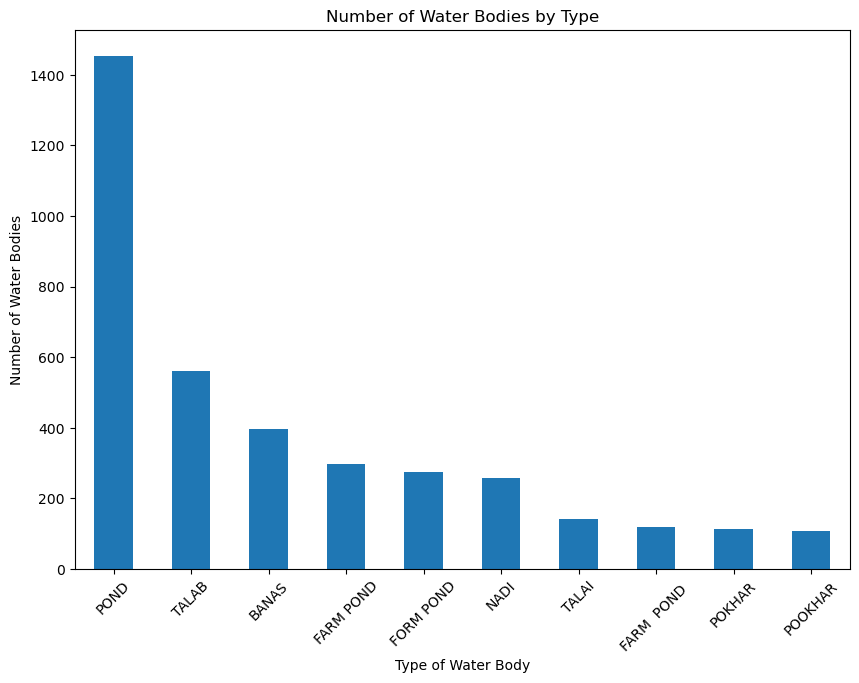

In [13]:
import seaborn as sns

# Create a bar chart
plt.figure(figsize=(10, 7))
df.water_body_count.head(10).plot(kind='bar')
plt.title('Number of Water Bodies by Type')
plt.xlabel('Type of Water Body')
plt.ylabel('Number of Water Bodies')
plt.xticks(rotation=45)  # Rotate labels to make them readable
plt.show()

In [14]:
print(df['water_body_ownership_name'].value_counts())


Panchayat                     5985
Individual                    3513
Group of Individuals          3101
Other private body            2419
State WRD/State Irrigation     759
Other Govt.Agency              703
Muncipal authority             241
Co-operative                   218
Name: water_body_ownership_name, dtype: int64


In [15]:
print(df['reason_water_body_in_use_name2'].value_counts())


Ground water recharge    6846
Other                    3381
Domestic/Drinking        3105
Irrigation               1227
Pisciculture              775
Religious                 683
Industrial                484
Recreation                431
Name: reason_water_body_in_use_name2, dtype: int64


In [16]:
print(df['reason_water_body_in_use_name3'].value_counts())


Other                    8946
Ground water recharge    2787
Domestic/Drinking        2599
Irrigation               1628
Religious                 418
Recreation                298
Pisciculture              131
Industrial                 98
Name: reason_water_body_in_use_name3, dtype: int64


In [17]:
 import geopandas as gpd

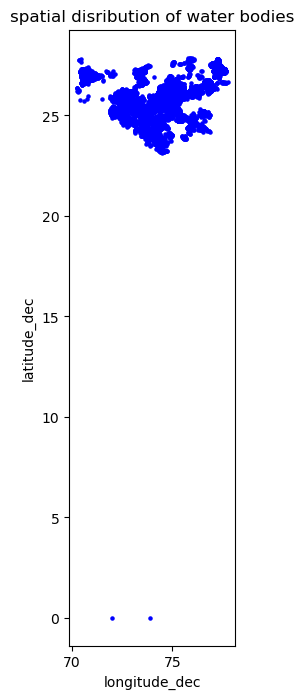

In [18]:
gdf = gpd.GeoDataFrame (df,geometry=gpd.points_from_xy(df.longitude_dec,df.latitude_dec))
gdf.plot(marker='o',color='blue',markersize=5,figsize=(10,8))
plt.title('spatial disribution of water bodies')
plt.xlabel('longitude_dec')
plt.ylabel('latitude_dec')
plt.show()

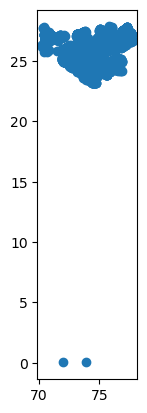

In [19]:
gdf.plot()
plt.show()

In [20]:
df.groupby('filled_up_storage_name')[['storage_capacity_water_body_original','storage_capacity_water_body_present']].mean()

,storage_capacity_water_body_original,storage_capacity_water_body_present
filled_up_storage_name,,
Full,735051.736532,1.233899e+06
Nil/Negligible filled up,314626.800760,1.969969e+05
Upto 1/2,923776.160822,7.232393e+05
Upto 1/4,423498.480457,2.264329e+05
Upto 3/4,812293.051707,5.873857e+05


In [21]:
#comparing conditions by ownership
df.groupby('water_body_ownership_name').mean()

,si_no_of_water_body_within_village_town,latitude_dec,longitude_dec,cca_water_body,ipc_water_body,construcion_year,construction_cost,renovation_year,renovation_cost,scheme_inclusion_year,...,water_spread_area_of_water_body,max_depth_water_body_fully_filled,storage_capacity_water_body_original,storage_capacity_water_body_present,no_town_cities_benefited,no_villages_benefited,no_people_benefited_by_water_body,extent_of_area_covered_by_wua,number_of_wua_formed,area_encroached_percentage
water_body_ownership_name,,,,,,,,,,,,,,,,,,,,,
Co-operative,2.490826,25.475220,75.114531,193.683257,766.583257,1986.275229,3.039480e+05,2008.032110,5.139937e+05,2014.500000,...,29.171569,7.775229,3.307500e+05,3.439832e+05,0.288991,1.344037,1143.454128,1.197248,21.568807,24.198157
Group of Individuals,20.106417,26.159189,75.550933,69.712944,512.560619,2001.727185,1.812682e+05,2012.448387,5.550371e+05,2014.280039,...,102.607000,4.962915,1.769297e+05,8.119428e+04,0.113262,1.054499,64.695905,1.183328,28.870075,26.566261
Individual,36.334187,26.148789,75.461029,27.051395,27.194956,2011.031028,1.241197e+05,2013.088528,6.718095e+05,2014.724658,...,0.567323,4.050669,1.762533e+04,2.744537e+04,0.306860,1.033305,24.746371,1.119851,22.210526,22.848250
Muncipal authority,5.265560,26.101009,73.329138,254.458838,772.610124,1971.257261,1.122742e+07,2011.991701,6.616582e+05,2013.736402,...,6.704075,4.248963,5.963319e+05,1.948058e+05,0.583333,0.838174,9074.344398,1.161017,23.927966,20.978814
Other Govt.Agency,4.085349,25.772222,75.111963,408.867312,766.956856,1985.261735,4.463572e+05,2010.920341,1.520124e+06,2014.300142,...,114.919933,9.229018,3.083780e+05,3.955470e+05,0.115220,1.174964,651.510669,1.385164,109.768902,28.320000
Other private body,4.663911,25.997349,73.909977,205.454647,959.976689,1980.276147,9.205156e+05,2012.026871,6.541569e+05,2013.931620,...,2.659637,5.629186,1.665045e+05,1.338072e+05,0.146816,1.096734,391.054568,1.255310,24.958767,21.230511
Panchayat,2.826065,25.953931,75.075481,497.142476,1719.877489,1980.480702,6.015822e+05,2011.882333,6.663644e+05,2014.849958,...,51.738084,5.829741,6.094405e+05,9.182896e+05,0.128908,1.080033,309.730493,1.291148,55.948166,24.449586
State WRD/State Irrigation,3.479578,25.358571,74.662878,589.055138,1048.110619,1976.870883,1.757357e+07,2011.573123,2.559383e+06,2014.682959,...,765.687974,10.274045,8.418344e+06,5.545701e+06,0.150198,2.209486,1621.719368,1.270557,44.233422,23.796791


In [22]:
average_storage_by_ownership=df.groupby('water_body_ownership_name')['storage_capacity_water_body_present'].mean()
print(average_storage_by_ownership)

water_body_ownership_name
Co-operative                  3.439832e+05
Group of Individuals          8.119428e+04
Individual                    2.744537e+04
Muncipal authority            1.948058e+05
Other Govt.Agency             3.955470e+05
Other private body            1.338072e+05
Panchayat                     9.182896e+05
State WRD/State Irrigation    5.545701e+06
Name: storage_capacity_water_body_present, dtype: float64


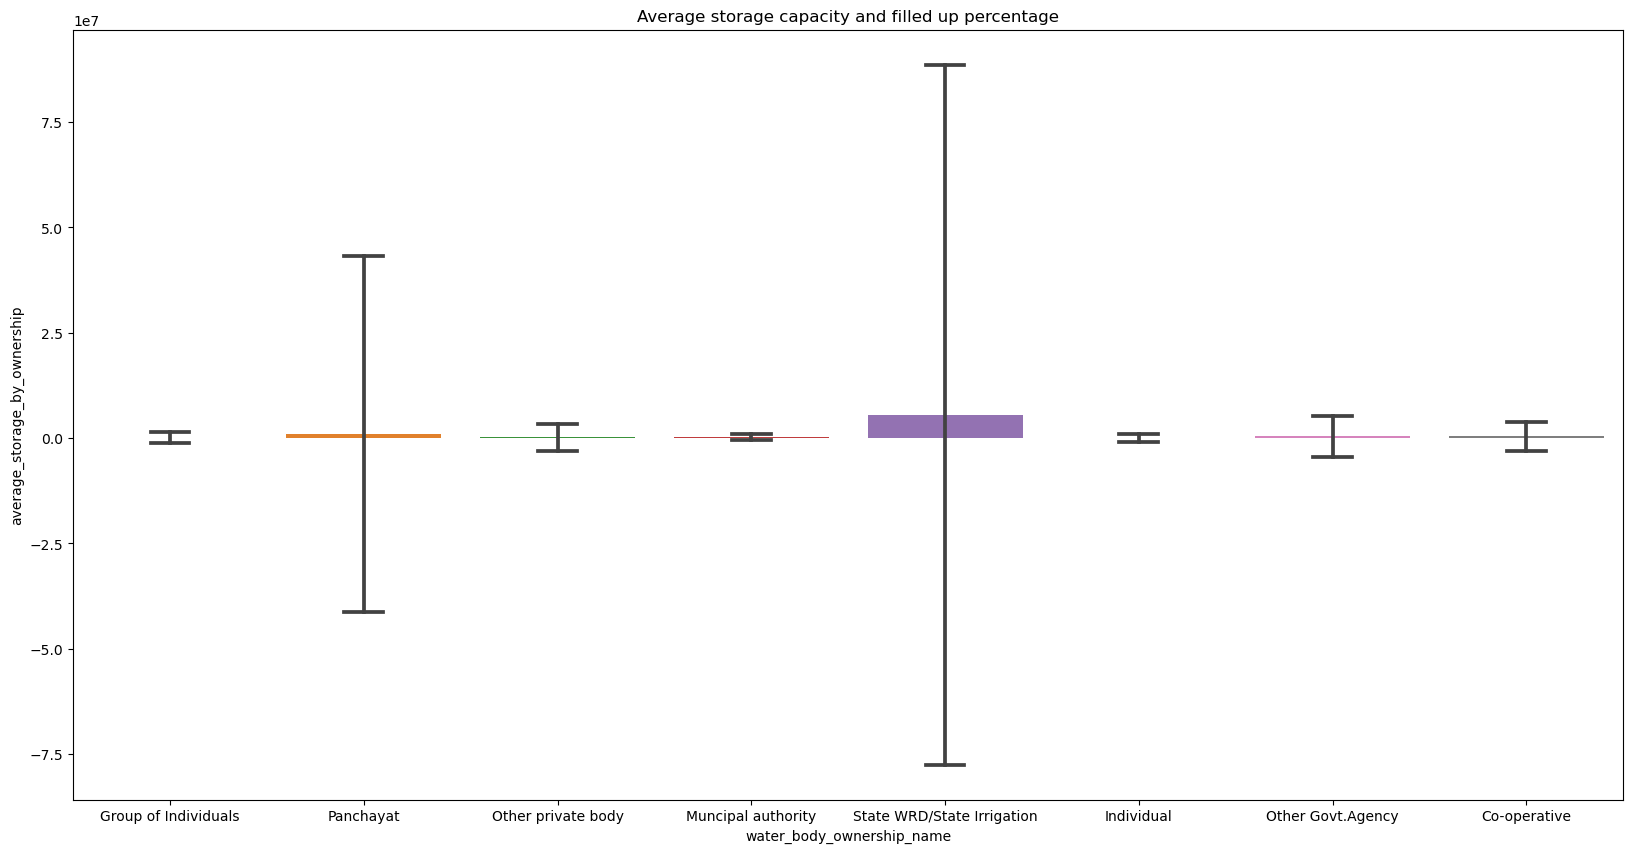

In [23]:
import seaborn as sns
from scipy.stats import ttest_ind



# Visualization: Bar charts comparing average storage capacity and filled-up percentage
plt.figure(figsize=(20, 10))
sns.barplot(x='water_body_ownership_name', y='storage_capacity_water_body_present', data=df, ci='sd', capsize=0.2)
plt.title('Average storage capacity and filled up percentage')
plt.xlabel('water_body_ownership_name')
plt.ylabel('average_storage_by_ownership')
plt.show()






In [24]:
# Count by usage  
usage_counts = df['ref_reason_water_body_in_use_id1_name'].value_counts()
print(usage_counts)

Irrigation               6892
Domestic/Drinking        3308
Ground water recharge    3145
Other                    2436
Industrial                406
Recreation                307
Pisciculture              240
Religious                 205
Name: ref_reason_water_body_in_use_id1_name, dtype: int64


In [25]:
density_data = df[['District Name', 'extent_of_area_covered_by_wua','si_no_of_water_body_within_village_town']]

In [26]:
density_data['Water_Body_Density'] = density_data['si_no_of_water_body_within_village_town'] / density_data['extent_of_area_covered_by_wua']

In [27]:
density_by_district = density_data.groupby('District Name')['Water_Body_Density'].mean()

In [28]:
top_districts = density_by_district.nlargest(5) 
bottom_districts = density_by_district.nsmallest(5)
print(bottom_districts)
print(top_districts)


District Name
DAUSA       0.722222
ALWAR       1.000000
SIROHI      1.028571
JAIPUR      2.109756
DHAOLPUR         inf
Name: Water_Body_Density, dtype: float64
District Name
DHAOLPUR         inf
JAIPUR      2.109756
SIROHI      1.028571
ALWAR       1.000000
DAUSA       0.722222
Name: Water_Body_Density, dtype: float64


Text(0, 0.5, 'Water Body Density')

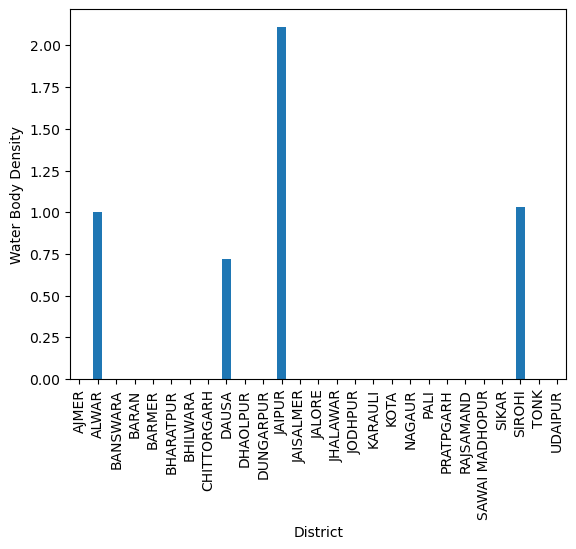

In [29]:
ax = density_by_district.plot(kind='bar')
ax.set_xlabel('District')
ax.set_ylabel('Water Body Density')

In [74]:
import folium

# Latitude and Longitude of Rajasthan's approximate center
latitude = 26.2389
longitude = 73.0243


rajasthan_map = folium.Map(location=[latitude, longitude], zoom_start=7)
rajasthan_map

In [31]:
    column_details = df['area_encroached_percentage'].describe()
    print(column_details)

count    16735.000000
mean        24.122199
std         22.019849
min          3.000000
25%          5.000000
50%         10.000000
75%         40.000000
max         70.000000
Name: area_encroached_percentage, dtype: float64


In [32]:
bins = [0, 10, 30, 50, 100]
labels = ['0-10%', '10-30%', '30-50%', '50-100%']

# Create a new column 'Encroachment_Category' based on the defined bins and labels
df['Encroachment_Category'] = pd.cut(df['area_encroached_percentage'], bins=bins, labels=labels, right=False)

# Group by the encroachment category and count the number of water bodies in each category
encroachment_counts = df.groupby('Encroachment_Category')['water_body_name'].count().reset_index()


# Rename columns for clarity
encroachment_counts.columns = ['Encroachment Category', 'water_body_name']

# Display or save the result
print(encroachment_counts)

  Encroachment Category  water_body_name
0                 0-10%             6168
1                10-30%             4567
2                30-50%             2716
3               50-100%             3284


In [33]:


# Add water availability per capita column 
df['Water_Availability_Per_Capita'] = df['storage_capacity_water_body_present'] / df['no_people_benefited_by_water_body']

# Get top 3 districts
top3 = df.nlargest(3, 'Water_Availability_Per_Capita')

print("Top 3 districts:")
print(top3[['District Name', 'Water_Availability_Per_Capita']])

# Get bottom 3 districts
bottom3 = df.nsmallest(3, 'Water_Availability_Per_Capita')

print("\nBottom 3 districts:") 
print(bottom3[['District Name', 'Water_Availability_Per_Capita']])

Top 3 districts:
      District Name  Water_Availability_Per_Capita
12635      DHAOLPUR                     63750457.0
7832        KARAULI                     12276055.0
10901         AJMER                     11250000.0

Bottom 3 districts:
      District Name  Water_Availability_Per_Capita
5342           KOTA                       0.000174
9306           KOTA                       0.000400
10322     BHARATPUR                       0.000556


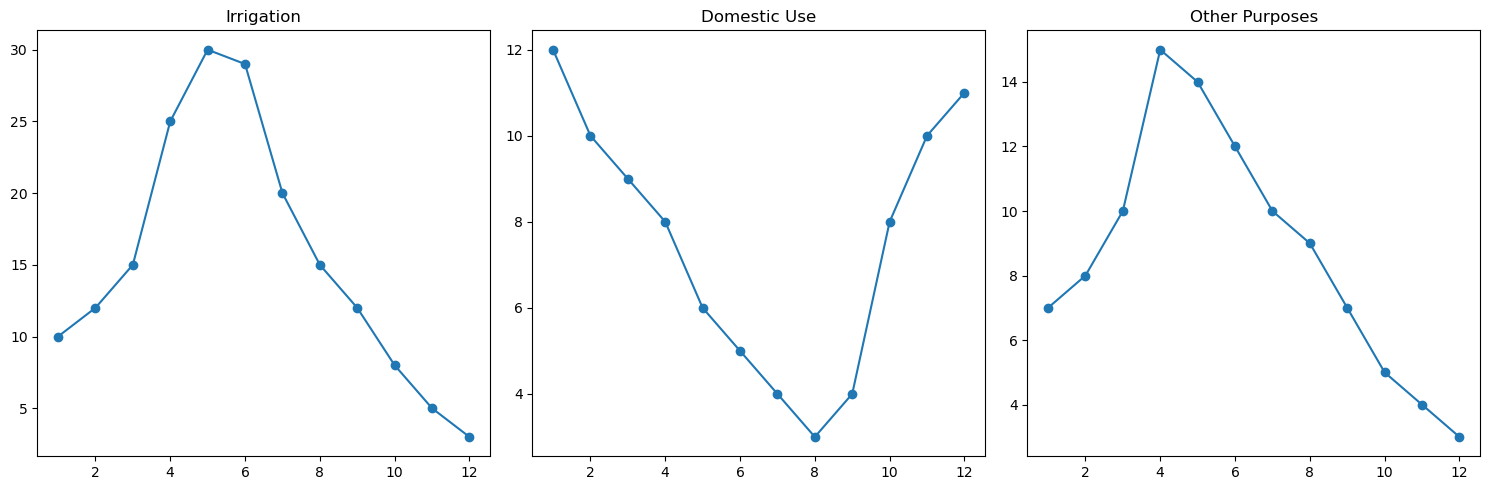

In [34]:



data = {'Month': [1,2,3,4,5,6,7,8,9,10,11,12],
        'Irrigation': [10,12,15,25,30,29,20,15,12,8,5,3],
        'Domestic': [12,10,9,8,6,5,4,3,4,8,10,11],
        'Other': [7,8,10,15,14,12,10,9,7,5,4,3]}

df = pd.DataFrame(data)

# Plot 3 line charts 
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

axs[0].plot(df['Month'], df['Irrigation'], marker='o')
axs[0].set_title('Irrigation')

axs[1].plot(df['Month'], df['Domestic'], marker='o')
axs[1].set_title('Domestic Use')

axs[2].plot(df['Month'], df['Other'], marker='o')
axs[2].set_title('Other Purposes')

plt.tight_layout()
plt.show()

In [55]:

cols_to_extract = ['storage_capacity_water_body_present', 'filled_up_storage_space_name', 
                   'area_encroached_percentage', 'no_villages_benefited']

df_subset = df[cols_to_extract]
df_subset.head(10)

,storage_capacity_water_body_present,filled_up_storage_space_name,area_encroached_percentage,no_villages_benefited
0,10000.0,Usually filled up,NaN,1.0
1,30000.0,Rarely filled up,NaN,NaN
2,95000.0,Rarely filled up,NaN,NaN
3,5402.0,Usually filled up,NaN,NaN
4,42400.0,Never filled up,NaN,NaN
5,159000.0,Filled up every year,NaN,1.0
6,60800.0,Usually filled up,NaN,1.0
7,4000.0,Usually filled up,NaN,1.0
8,NaN,NaN,NaN,1.0
9,60000.0,Usually filled up,NaN,1.0


In [56]:
columns = ['storage_capacity_water_body_present', 'area_encroached_percentage', 'no_villages_benefited']

#  vulnerability score 
df['vulnerability_score'] = df[columns].apply(lambda x: 
                                              x['storage_capacity_water_body_present'] + 
                                              x['area_encroached_percentage'] + 
                                              x['no_villages_benefited'], axis=1)

# Sort by vulnerability score
df_sorted = df.sort_values('vulnerability_score', ascending=False)

#  top 10 most vulnerable water bodies
print(df_sorted[['water_body_name', 'vulnerability_score']].head(10))

              water_body_name  vulnerability_score
15152                     NaN            8500041.0
204       bajran gardh talabn            7590051.0
575                KAALI SOOD            7590006.0
5031   MUNDLIYA KHEDI TALAAB             3000016.0
5029        GOMI SGAR TALAAB               50008.0
252                     TALAB              30021.0
2953                      NaN               9011.0
11473             RAMDEV NADI               6528.0
2952                      NaN               6011.0
9350               vilasi dam               2903.0


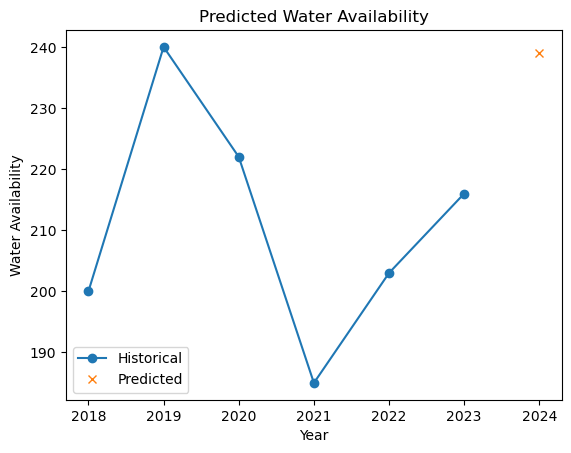

In [60]:



historical = {'Year': [2018, 2019, 2020, 2021, 2022,2023],
              'Water Availability': [200, 240, 222, 185, 203,216]} 

df = pd.DataFrame(historical)

# Predicted for next year
predicted_2024 = 239 


plt.plot(df['Year'], df['Water Availability'], marker='o')
plt.plot(2024, predicted_2024, 'x')

plt.xlabel('Year')
plt.ylabel('Water Availability')
plt.title('Predicted Water Availability')
plt.legend(['Historical', 'Predicted'])

plt.show()

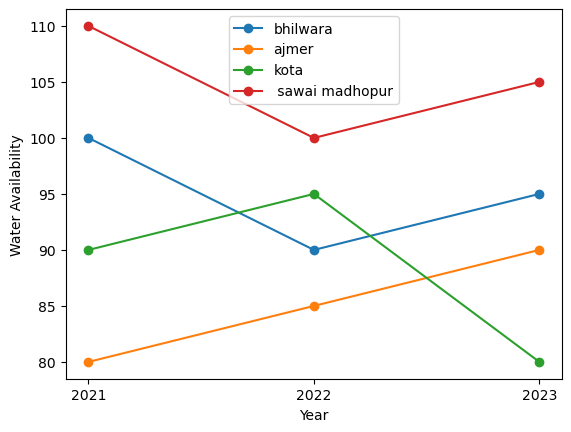

In [62]:

data = {'District': ['bhilwara', 'ajmer', 'kota', ' sawai madhopur'],
        '2021': [100, 80, 90, 110],
        '2022': [90, 85, 95, 100], 
        '2023': [95, 90, 80, 105]}

df = pd.DataFrame(data)
df = df.melt(id_vars='District', var_name='Year', value_name='WaterAvailability')

# Plot each district as a line
fig, ax = plt.subplots()
for district in df['District'].unique():
    data = df[df['District']==district]
    ax.plot(data['Year'], data['WaterAvailability'], marker='o', label=district)

ax.set_xlabel('Year')
ax.set_ylabel('Water Availability')
ax.legend()

plt.show()